<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/06-Trabalho_Silvestre_Henrique_final_de_estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nome: Silvestre Henrique Ferreira Cerejo 
# Professor: Eduardo Monteiro de Castro Gomes
# TRABALHO ESTATISTICA DESCRITIVA

**Contextualização do Problema**

O trabalho propõe **comparar os dados de acidentes em rodovias antes a após a execução de obras públicas fazendo uma estimativa dos benefícios** auferidos com a execução dos investimentos em termos de redução dos acidentes e mortes em rodovias.

Para este trabalho em estatísdica descritiva os dados foram baixados do endereço: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes; como os dados são disponibilizados em arquivos separados em arquivos .csv por ano, os arquivos condesnados em arquivo único.

In [ ]:
#Carga dos pacotes a serem utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importação do arquivo para o COLAB
from google.colab import files
uploaded = files.upload()


Saving datatran2020-2015c.csv to datatran2020-2015c (1).csv


In [ ]:
import io
prf = pd.read_csv(io.BytesIO(uploaded['datatran2020-2015c.csv']),encoding= "iso8859_16")
prf.head(3)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,km_trunc,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,01/01/2020,2020,1,quarta-feira,01:00:00,TO,153.0,678.1,678,GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Năo,5,0,0,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN
1,260036.0,01/01/2020,2020,1,quarta-feira,01:00:00,RJ,116.0,178.0,178,NOVA IGUACU,Falta de Atençăo do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,01/01/2020,2020,1,quarta-feira,01:52:00,SC,101.0,206.9,206,SAO JOSE,Ingestăo de Álcool,Colisăo lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC


Na base de dados temos as seguntes variáveis: 

**Qualitativas Nominais** = ufmunicipio, causa_acidente, tipo_acidente,  sentido_via, regional, tipo_pista, condicao_metereologica, tracado_via, delegacia, uso_solo e uop.

**Qualitativas Ordinais** =  id, br, dia_semana, mes, fase_dia e classificacao_acidente.

**Quantitativas Discretas** =  data_inversa, ano,    pessoas, mortos,feridos_leves, feridos_graves, ilesos, ignorados, feridos e veiculos.

**Quantitativas Continuas =** horario, km, latitude e longitude.

Obseravação:
1 - Cada linha da base é o registro de um acidente.
2 - Latitude, longitude disponíveis apenas para dados a partir de 2017

In [ ]:
#acidentes_feridos_mortos = prf.groupby(['ano'])['feridos','mortos'].agg(['count','sum']).reset_index()
feridos_mortos = prf.groupby(['ano'])['feridos','mortos'].sum().reset_index()
feridos_mortos
acidentes_ano = prf.groupby(['ano'])['id'].count().reset_index()
acidentes_ano
acidentes_feridos_mortos=pd.merge(feridos_mortos,acidentes_ano, on='ano')
acidentes_feridos_mortos.rename(columns={'id':'acidentes'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ano,feridos,mortos,acidentes
0,2015,90251,6867,122161
1,2016,86672,6398,96363
2,2017,84317,6247,89563
3,2018,76647,5271,69295
4,2019,79073,5333,67446
5,2020,71480,5291,63548


Percebece dos dados acima uma significativa redução do número de acidentes 122.161 em 2015, para 63.548 em 2020 (48%), no número de ferídos de 90.251 para 71.480 (20,8%), e uma redução do número mortos de 6.867 para 5.291, ou seja, 23%.

Assim, há uma tendência natural de queda do número de acidentes relacionados à outros fatores (lei seca, educação transito, controle de velocidade, melhoria veículos, etc.), não apenas as execução de obras, pois a redução é observada também em seguimentos que não receberam investimentos.

Como indicador de acidentes utilizaremos a **Unidade Padrão de Severidade - UPS**, que nada mais é que aplicar o peso de 1 para acidentes sem vítimas, 5 para acidentes com ferídos e 13 para acidentes com ao menos uma vítima fatal.

In [ ]:
#Severidade
def severidade(classificacao_acidente):
    if classificacao_acidente == 'Com Vítimas Feridas':
        return 5
    if classificacao_acidente == 'Com Vítimas Fatais':
        return 13
    if classificacao_acidente == 'Sem Vítimas':
        return 1
    if classificacao_acidente == 'Ignorado':
        return 1 
prf["ups"] = prf.classificacao_acidente.map(severidade)
prf.head(3)

,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,km_trunc,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ups
0,260031.0,01/01/2020,2020,1,quarta-feira,01:00:00,TO,153.0,678.1,678,GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Năo,5,0,0,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN,5.0
1,260036.0,01/01/2020,2020,1,quarta-feira,01:00:00,RJ,116.0,178.0,178,NOVA IGUACU,Falta de Atençăo do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ,13.0
2,260037.0,01/01/2020,2020,1,quarta-feira,01:52:00,SC,101.0,206.9,206,SAO JOSE,Ingestăo de Álcool,Colisăo lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC,5.0


In [ ]:
ups_var = prf.groupby(['ano'])['ups'].sum().reset_index()
#ups_var
acidentes_feridos_mortos_ups=pd.merge(acidentes_feridos_mortos,ups_var, on='ano')
acidentes_feridos_mortos_ups

,ano,feridos,mortos,id,ups
0,2015,90251,6867,122161,416232.0
1,2016,86672,6398,96363,380114.0
2,2017,84317,6247,89563,366555.0
3,2018,76647,5271,69295,321527.0
4,2019,79073,5333,67446,327282.0
5,2020,71480,5291,63548,307552.0


Assim a redução em termos de UPS média para todas as rodovias ferderais foi de 26,1%.

In [ ]:
plt.figure(figsize=(10,5))
g = sns.lineplot(x = 'ano', y= ('id') , data=acidentes_ano)
g.set_title('Variação acidentes Brasil 2015-2020')
plt.xticks(rotation=30)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
gf = sns.lineplot(x = 'ano', y= ('feridos') , data=feridos_mortos)
gf.set_title('Variação feridos Brasil 2015-2020')
plt.xticks(rotation=30)
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
gm = sns.lineplot(x = 'ano', y= ('mortos') , data=feridos_mortos)
gm.set_title('Variação número mortos Brasil 2015-2020')
plt.xticks(rotation=30)
plt.show()

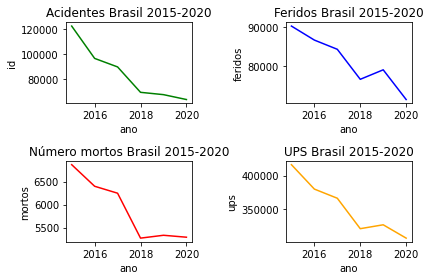

<Figure size 14400x720 with 0 Axes>

In [ ]:
#falta descobrir como aumenta as figuras juntas
fig, ax = plt.subplots(2,2)
g = sns.lineplot(ax = ax[0,0], x = 'ano', y= ('id') , data=acidentes_ano, color="green")
g.set_title('Acidentes Brasil 2015-2020')
gf = sns.lineplot(ax = ax[0,1], x = 'ano', y= ('feridos') , data=feridos_mortos, color="blue")
gf.set_title('Feridos Brasil 2015-2020')
gm = sns.lineplot(ax = ax[1,0], x = 'ano', y= ('mortos') , data=feridos_mortos, color="red")
gm.set_title('Número mortos Brasil 2015-2020')
gups = sns.lineplot(ax = ax[1,1], x = 'ano', y= ('ups') , data=acidentes_feridos_mortos_ups, color="orange")
gups.set_title('UPS Brasil 2015-2020')
fig.tight_layout()
plt.figure(figsize=(200,10)) 
plt.show()

Assim, percebe-se que o número de acidentes, assim como os números de mortos e feridos, vem caíndo nos últimos anos. A seguir se apresenta a sazionalidade dos números de acidentes, para justificar porque da utilização das sempre dos parâmetros anuais. 

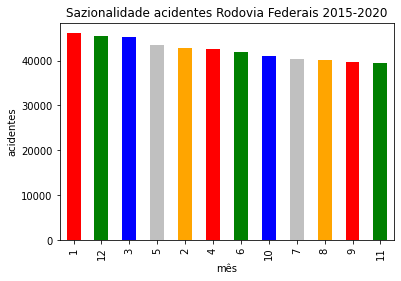

In [ ]:
fig , ax = plt.subplots()
prf["mês"].value_counts().plot.bar(color=["red","green","blue","silver","orange"])
ax.set_ylabel("acidentes")
ax.set_xlabel("mês")
ax.set_title("Sazionalidade acidentes Rodovia Federais 2015-2020")
plt.show()

Assim os meses de janeiro, dezembro e fevereiro concentram o maior número de acidentes nas rodovias federais. Logo para cálculo da redução dos acidentes utilizaremos médias anuais, para que esse fator não interfira nas análises.

In [ ]:
acidentes_uf = prf.groupby(['uf','ano'])['id'].agg(['count']).reset_index()
acidentes_uf['ano']=acidentes_uf['ano'].astype('str') #trocar formato dado
acidentes_uf


,uf,ano,count
0,AC,2015,468
1,AC,2016,330
2,AC,2017,304
3,AC,2018,235
4,AC,2019,254
...,...,...,...
157,TO,2016,836
158,TO,2017,785
159,TO,2018,589
160,TO,2019,520


In [ ]:
acidentes_uf_pivot= acidentes_uf.pivot(index='uf', columns='ano', values='count')
acidentes_uf_pivot
acidentes_uf_pivot['dif%']= acidentes_uf_pivot.apply(lambda linha:(linha['2015']-linha['2020'])/linha['2015'], axis=1)
acidentes_uf_pivot.sort_values(by="dif%", ascending=False)

ano,2015,2016,2017,2018,2019,2020,dif%
uf,,,,,,,
PA,2318,1733,1504,1260,817,963,0.584556
RS,9869,7515,6386,4445,4595,4176,0.576857
RJ,9571,6118,5969,4575,4606,4236,0.557413
SP,8901,6632,6011,4516,4377,4043,0.545781
BA,7152,5496,4687,3555,3471,3456,0.516779
PE,5079,3623,3441,2715,2736,2560,0.495964
PB,2753,1932,1852,1588,1564,1401,0.491101
SC,14037,10605,10665,8497,8428,7220,0.485645
SE,1097,763,763,559,612,575,0.475843


In [ ]:
def determina_regiao(uf):
    if uf in ("DF" , "MS" , "MT" , "GO"):
        return "CO"
    if uf in ( "AC", 'AP' , "RO" , "PA",'AM','TO','RR'):
        return "N"
    if uf in ('AL', "BA" , 'CE', "MA" , "PB",'PE' , "PI" , "RN", "SE"):
        return "NE"
    if uf in ( "RS" , "PR" , "SC"):
        return "S"
    if uf in ( "SP" , "ES" , "MG" , "RJ"):
        return "SE"
acidentes_uf["regiao"] = acidentes_uf.uf.map(determina_regiao)
#acidentes_uf

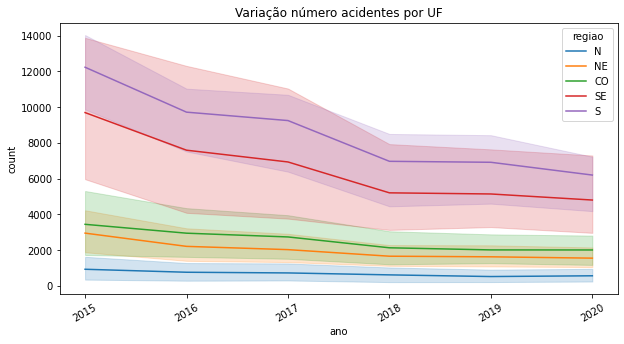

In [ ]:
plt.figure(figsize=(10,5))
g = sns.lineplot(x = 'ano', y= 'count', data=acidentes_uf, hue='regiao')
g.set_title('Variação número acidentes por UF')
plt.xticks(rotation=30)
plt.show()


Tipos de acidente mais frequentes:

In [ ]:
tipo_ac = prf.groupby(['tipo_acidente'])['id'].count().reset_index()
tipo_ac.sort_values(by="id", ascending=False).head(10)


,tipo_acidente,id
17,Colisăo traseira,103130
13,Colisăo lateral,62983
28,Saída de leito carroçável,47807
27,Saída de Pista,36034
16,Colisăo transversal,35425
29,Tombamento,32714
12,Colisăo frontal,29366
4,Capotamento,25902
5,Colisăo Transversal,23810
9,Colisăo com objeto estático,21733


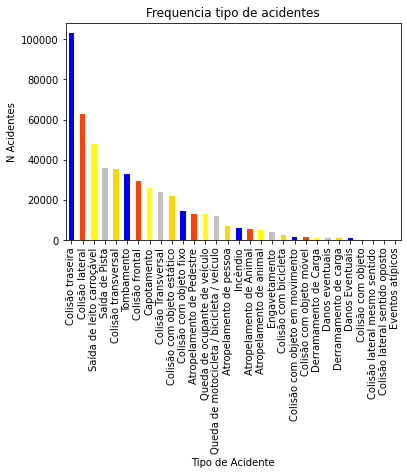

<Figure size 28800x7200 with 0 Axes>

In [ ]:
fig , ax = plt.subplots()
prf["tipo_acidente"].value_counts().plot.bar(color=["blue","#ff4000","yellow","silver","gold"])
ax.set_ylabel("N Acidentes")
ax.set_xlabel("Tipo de Acidente")
ax.set_title("Frequencia tipo de acidentes")
plt.figure(figsize=(400,100)) 
plt.show()

In [ ]:
def tipos_condensados(tipo_acidente):
    if tipo_acidente in ('Colisão com objeto estático','Colisão com objeto fixo','Atropelamento de Pedestre','Queda de ocupante de veículo',"Queda de motocicleta / bicicleta / veículo" , "Atropelamento de Animal" ,
                                  "Atropelamento de pessoa" , "Incêndio",'Engavetamento', 'Colisão com bicicleta',
                          'Derramamento de carga','Danos eventuais','Colisão com objeto em movimento','Colisão com objeto móvel','Colisão com objeto',
                         'Colisão lateral mesmo sentido', 'Colisão lateral sentido oposto', 'Eventos atípicos'):
        return "outros"
    #else: return "tipo_acidente"
    if tipo_acidente in ('Capotamento'):
        return 'Capotamento'
    if tipo_acidente in ('Colisăo frontal'):
        return 'Colisăo frontal'    
    if tipo_acidente in ('Tombamento'):
        return 'Tombamento'
    if tipo_acidente in ('Colisăo transversal'):
        return 'Colisăo transversal'
    if tipo_acidente in ('Saída de Pista'):
        return 'Saída de Pista'    
    if tipo_acidente in ('Saída de leito carroçável'):
        return 'Saída de leito carroçável'
    if tipo_acidente in ('Colisăo lateral'):
        return 'Colisăo lateral'    
    if tipo_acidente in ('Colisăo traseira'):
        return 'Colisăo traseira'       


prf["tipo_acidente_c"] = prf.tipo_acidente.map(tipos_condensados)
#prf.head()


Assim o tipo de acidente mais frequente é a colisão traseira, seguido pela colisão lateral, porém são acidentes geralmente de menor gravidade.

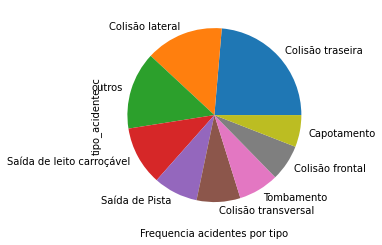

In [ ]:
fig , ax = plt.subplots()
prf["tipo_acidente_c"].value_counts('id').plot.pie()
ax.set_xlabel("Frequencia acidentes por tipo")
plt.show()

In [ ]:
mortos_tipo_ac = prf.groupby(['tipo_acidente'])['mortos'].agg(['sum','mean']).reset_index()
mortos_tipo_ac.sort_values(by="sum", ascending=False).head(10)

,tipo_acidente,sum,mean
12,Colisăo frontal,11059,0.376592
1,Atropelamento de Pedestre,3714,0.280895
17,Colisăo traseira,3494,0.033880
28,Saída de leito carroçável,2541,0.053151
13,Colisăo lateral,2127,0.033771
3,Atropelamento de pessoa,2055,0.286132
16,Colisăo transversal,1881,0.053098
27,Saída de Pista,1435,0.039824
5,Colisăo Transversal,1191,0.050021
29,Tombamento,1171,0.035795


Assim, o tipo de acidente que causa o maior número de mortes é a colisão frontal. Portanto, para exemplo de avaliação dos benefícios de obra, escolheremos obras de duplicação, pois são as que tem maior capacidade de redução desses tipos de acidente.

In [ ]:
#As dez rodovias com mais mortes no Brasil
mortos_rodovia = prf.groupby(['uf','br'])['mortos'].agg(['sum','max']).reset_index()
mortos_rodovia.sort_values(by="sum", ascending=False).head(10)


,uf,br,sum,max
105,MG,381.0,1132,13
256,SP,116.0,1012,4
17,BA,101.0,949,8
178,PR,277.0,902,7
88,MG,40.0,825,8
90,MG,116.0,812,7
19,BA,116.0,809,7
239,SC,101.0,797,5
189,RJ,101.0,769,7
182,PR,376.0,727,4


Assim, a rodovia federal com maior número de mortos no período é a BR-381-MG, que está com obras de duplicação com mais de 90% cncluídas.

In [ ]:
#As dez rodovias maior severidade no Brasil
rodovia_ups = prf.groupby(['uf','br'])['ups'].agg(['sum']).reset_index()
rodovia_ups.sort_values(by="sum", ascending=False).head(5)

,uf,br,sum
239,SC,101.0,112061.0
256,SP,116.0,91779.0
105,MG,381.0,86931.0
56,ES,101.0,60225.0
182,PR,376.0,58656.0


Recorta-se agora apenas os dados da BR-381/MG que está com obras de duplicação no período em dois lotes entre BH e Governdador Valadares, L**ote 03 (entre kms 288,4 e 317)**, praticamente concluído, e **Lote 07 (entre kms 389,5 e 427)** com parte das obras entregues em 2014, portanto, antes do período 2015-2020. Ambos os lotes estão com execução financeira maior que 90%, mas nenhum dos contratos concluídos.

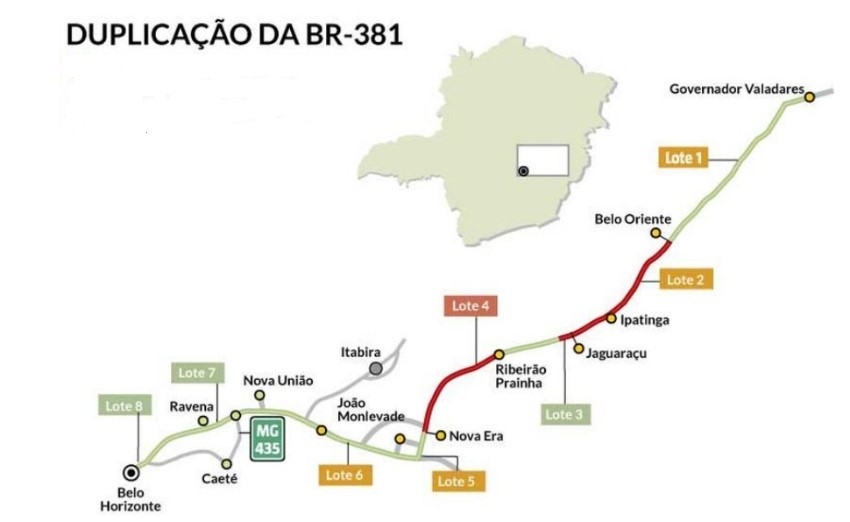

In [ ]:
import io
br_381_mg = pd.read_csv(io.BytesIO(uploaded['BR_381_MG_c.csv']), delimiter=';', decimal=',', encoding= "latin1")
br_381_mg.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,Duplicação,municipio,causa_acidente,tipo_acidente,classificacao_acidente,UPS,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,UPS.1
0,260067,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,671.5,sem obra,PERDOES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,5,Pleno dia,Crescente,Chuva,Dupla,Não Informado,Não,4,0,4,0,0,0,4,1,-21.08945416,-45.06864195,SR-MG,DEL4/4,UOP02/MG,5
1,260075,01/01/2020,2020,1,quarta-feira,05:30:00,MG,381,548.5,sem obra,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,1,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-20.3102109,-44.44993116,SR-MG,DEL4/4,UOP03/MG,1
2,260078,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,325,sem obra,NOVA ERA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,5,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.76099646,-43.0362466,SR-MG,DEL4/3,UOP02/MG,5


In [ ]:
br_381_mg['km']=br_381_mg['km'].astype('float') #trocar tipo dado


In [ ]:
feridos_mortos381 = br_381_mg.groupby(['ano'])['feridos','mortos'].sum().reset_index()
acidentes_ano381 = br_381_mg.groupby(['ano'])['id'].count().reset_index()
acidentes_feridos_mortos381=pd.merge(feridos_mortos381,acidentes_ano381, on='ano')
acidentes_feridos_mortos381.rename(columns={'id':'acidentes'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ano,feridos,mortos,acidentes
0,2015,4129,225,5020
1,2016,3975,192,4616
2,2017,3915,222,4180
3,2018,3346,171,2944
4,2019,3505,144,2650
5,2020,3226,178,2517


In [ ]:
#pedaço da BR-381 duplicado (exercício do Estefano)
def obra_duplicação(km):
    if km < 288.4:
        return 'sem obra'
    if km >= 288.4 and km < 317:
        return 'Lote 3'
    if km >= 317 and km < 389.5:
        return 'sem obra'
    if km >= 389.5 and km < 427:
        return 'Lote 7' 
    if km >= 427:
        return 'sem obra'        
    
br_381_mg['obra_duplicação'] = br_381_mg.km.map(obra_duplicação)
br_381_mg.head(3)

,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,Duplicação,municipio,causa_acidente,tipo_acidente,classificacao_acidente,UPS,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,UPS.1,obra_duplicação
0,260067,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,671.5,sem obra,PERDOES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,5,Pleno dia,Crescente,Chuva,Dupla,Não Informado,Não,4,0,4,0,0,0,4,1,-21.08945416,-45.06864195,SR-MG,DEL4/4,UOP02/MG,5,sem obra
1,260075,01/01/2020,2020,1,quarta-feira,05:30:00,MG,381,548.5,sem obra,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,1,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-20.3102109,-44.44993116,SR-MG,DEL4/4,UOP03/MG,1,sem obra
2,260078,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,325.0,sem obra,NOVA ERA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,5,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.76099646,-43.0362466,SR-MG,DEL4/3,UOP02/MG,5,sem obra


Calcula-se abaixo a redução da severidade segregando os segmentos que receberam obras:

In [ ]:
br_381_mg_var = br_381_mg.groupby(['obra_duplicação', 'ano'])['UPS'].agg(['sum']).reset_index()
br_381_mg_var['ano']=br_381_mg_var['ano'].astype('str') #trocar formato dado
br_381_mg_var_pivot= br_381_mg_var.pivot(index='obra_duplicação', columns='ano', values='sum')
br_381_mg_var_pivot

br_381_mg_var_pivot['dif%']= br_381_mg_var_pivot.apply(lambda linha:(linha['2015']-linha['2020'])/linha['2015'], axis=1)
br_381_mg_var_pivot.sort_values(by="dif%", ascending=False)

ano,2015,2016,2017,2018,2019,2020,dif%
obra_duplicação,,,,,,,
Lote 3,529,493,419,244,212,156,0.705104
Lote 7,751,589,533,276,515,476,0.366178
sem obra,16112,15202,14604,12360,11819,11641,0.277495


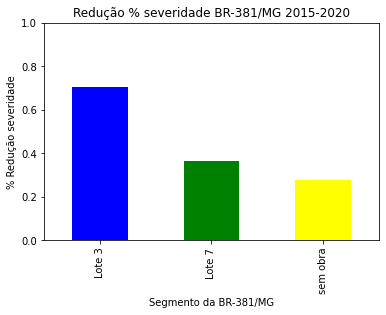

In [ ]:
fig , ax = plt.subplots()
br_381_mg_var_pivot["dif%"].plot.bar(color=["blue",'green',"yellow"])
ax.set_ylabel("% Redução severidade")
ax.set_xlabel("Segmento da BR-381/MG")
ax.set_title("Redução % severidade BR-381/MG 2015-2020")
ax.set_ylim(0,1)
plt.show()

Assim, estimamos com a uma redução de 43% (70-27% severidade média) como benefício da duplicação do segmento. Em termos financeiros:

In [ ]:
#pedaço da BR-381 duplicado (exercício do Estefano)
def custo_acidente(classificacao_acidente):
    if classificacao_acidente == 'Com Vítimas Fatais':
        return 664821.46*1.3529
    if classificacao_acidente == 'Com Vítimas Feridas':
        return 96747.79*1.3529
    if classificacao_acidente == 'Sem Vítimas' or 'Ignorado':
        return 23498.77*1.3529
    
br_381_mg['custo_ac'] = br_381_mg.km.map(custo_acidente)
br_381_mg.head(3)

,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,Duplicação,municipio,causa_acidente,tipo_acidente,classificacao_acidente,UPS,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,UPS.1,obra_duplicação,custo_ac
0,260067,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,671.5,sem obra,PERDOES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,5,Pleno dia,Crescente,Chuva,Dupla,Não Informado,Não,4,0,4,0,0,0,4,1,-21.08945416,-45.06864195,SR-MG,DEL4/4,UOP02/MG,5,sem obra,31791.485933
1,260075,01/01/2020,2020,1,quarta-feira,05:30:00,MG,381,548.5,sem obra,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,1,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-20.3102109,-44.44993116,SR-MG,DEL4/4,UOP03/MG,1,sem obra,31791.485933
2,260078,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,325.0,sem obra,NOVA ERA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,5,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.76099646,-43.0362466,SR-MG,DEL4/3,UOP02/MG,5,sem obra,31791.485933


In [ ]:
br_381_mg_custo_ac = br_381_mg.groupby(['obra_duplicação', 'ano'])['custo_ac'].agg(['sum']).reset_index()
br_381_mg_custo_ac.head

<bound method NDFrame.head of    obra_duplicação   ano           sum
0           Lote 3  2015  4.609765e+06
1           Lote 3  2016  4.609765e+06
2           Lote 3  2017  3.528855e+06
3           Lote 3  2018  1.780323e+06
4           Lote 3  2019  1.525991e+06
5           Lote 3  2020  1.017328e+06
6           Lote 7  2015  6.072174e+06
7           Lote 7  2016  4.355434e+06
8           Lote 7  2017  3.338106e+06
9           Lote 7  2018  1.653157e+06
10          Lote 7  2019  2.893025e+06
11          Lote 7  2020  2.924817e+06
12        sem obra  2015  1.489113e+08
13        sem obra  2016  1.377843e+08
14        sem obra  2017  1.260215e+08
15        sem obra  2018  9.016065e+07
16        sem obra  2019  7.982842e+07
17        sem obra  2020  7.607703e+07>


Utilizando os valores publicados no documento: “Estimativa dos Custos dos Acidentes de Trânsito no Brasil com Base na Atualização Simplificada das Pesquisas Anteriores do Ipea" 2015,quais sejam: Acidente com fatalidade R 664.821,46; Acidentes com vítimas R 96.747,79; e Sem vítimas R 23.498,77 rigidos pelo IPCA p/ dezembro/2020. Chegasse ao benefício de **R 1,98 milhões/ano** com a duplicação do lote 03 e de **R 607 mil** para o lote 07**. 


In [ ]:
br_381_mg_varm = br_381_mg.groupby(['obra_duplicação', 'ano'])['mortos'].agg(['sum']).reset_index()
br_381_mg_varm 
br_381_mg_varm['ano']=br_381_mg_varm['ano'].astype('str') #trocar formato dado
br_381_mg_varm_pivot= br_381_mg_varm.pivot(index='obra_duplicação', columns='ano', values='sum')
br_381_mg_varm_pivot

br_381_mg_varm_pivot['dif%']= br_381_mg_varm_pivot.apply(lambda linha:(linha['2015']-linha['2020'])/linha['2015'], axis=1)
br_381_mg_varm_pivot.sort_values(by="dif%", ascending=False)

ano,2015,2016,2017,2018,2019,2020,dif%
obra_duplicação,,,,,,,
Lote 3,5,2,6,2,5,2,0.600000
sem obra,211,178,204,165,125,165,0.218009
Lote 7,9,12,12,4,14,11,-0.222222


Subindo dados a partir de 2013, apenas para a BR-381/MG para demonstrar o resultado do Lote 7:

In [ ]:
import io
br_381_mg1 = pd.read_csv(io.BytesIO(uploaded['BR_381_MG_2013-2020.csv']), delimiter=';', decimal=',', encoding= "latin1")
br_381_mg1.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,UPS,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260067,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,671.5,PERDOES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,5,Pleno dia,Crescente,Chuva,Dupla,Não Informado,Não,4,0,4,0,0,0,4,1,-2.108.945.416,-4.506.864.195,SR-MG,DEL4/4,UOP02/MG
1,260075,01/01/2020,2020,1,quarta-feira,05:30:00,MG,381,548.5,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,1,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-203.102.109,-4.444.993.116,SR-MG,DEL4/4,UOP03/MG
2,260078,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,325,NOVA ERA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,5,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-1.976.099.646,-430.362.466,SR-MG,DEL4/3,UOP02/MG


In [ ]:
br_381_mg1['km']=br_381_mg1['km'].astype('float') #trocar tipo dado
br_381_mg1['obra_duplicação'] = br_381_mg1.km.map(obra_duplicação)
br_381_mg1.head(3)

,id,data_inversa,ano,mês,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,UPS,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,obra_duplicação
0,260067,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,671.5,PERDOES,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,5,Pleno dia,Crescente,Chuva,Dupla,Não Informado,Não,4,0,4,0,0,0,4,1,-2.108.945.416,-4.506.864.195,SR-MG,DEL4/4,UOP02/MG,sem obra
1,260075,01/01/2020,2020,1,quarta-feira,05:30:00,MG,381,548.5,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,1,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-203.102.109,-4.444.993.116,SR-MG,DEL4/4,UOP03/MG,sem obra
2,260078,01/01/2020,2020,1,quarta-feira,06:00:00,MG,381,325.0,NOVA ERA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,5,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-1.976.099.646,-430.362.466,SR-MG,DEL4/3,UOP02/MG,sem obra


In [ ]:


br_381_mg_var1 = br_381_mg1.groupby(['obra_duplicação', 'ano'])['UPS'].agg(['sum']).reset_index()
#br_381_mg_var1
br_381_mg_var1['ano']=br_381_mg_var1['ano'].astype('str') #trocar formato dado
br_381_mg_var_pivot1= br_381_mg_var1.pivot(index='obra_duplicação', columns='ano', values='sum')
br_381_mg_var_pivot1

br_381_mg_var_pivot1['dif%']= br_381_mg_var_pivot1.apply(lambda linha:(linha['2013']-linha['2020'])/linha['2013'], axis=1)
br_381_mg_var_pivot1.sort_values(by="dif%", ascending=False)

ano,2013,2014,2015,2016,2017,2018,2019,2020,dif%
obra_duplicação,,,,,,,,,
Lote 3,653,574,529,493,419,244,212,156,0.761103
Lote 7,1182,1148,751,589,533,276,515,476,0.597293
sem obra,23058,19390,16112,15202,14604,12360,11819,11641,0.495143


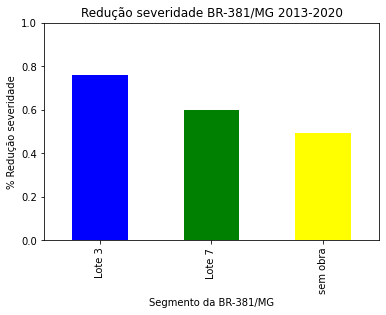

In [ ]:
fig , ax = plt.subplots()
br_381_mg_var_pivot1["dif%"].plot.bar(color=["blue",'green',"yellow"])
ax.set_ylabel("% Redução severidade")
ax.set_xlabel("Segmento da BR-381/MG")
ax.set_title("Redução severidade BR-381/MG 2013-2020")
ax.set_ylim(0,1)
plt.show()

# ** Conclusão Preliminar:**

Assim, percebe-se que como esperado os segmentos que receberam obras de duplicação apresentam uma redução do número de acidentes maior que a observada nos demais segmentos da rodovia. Porém, mesmo com o período expandido para 2013 as obras do lote 03 apresentam um desempenho superior ao do Lote 07, deve-se procucarar a exlicação por outras variáveis ainda não acrescentadas no modelo, a exemplo: variação do tráfego no segmentos e alteração/instalação/desinstalação de instrumentos de controle de velocidade nos segmentos, além da informação mais detalhada de quando cada subtrecho foi liberado para o tráfego. 